In [81]:
## LIBS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

## READ DATA
main = pd.read_csv(r'Student Depression Dataset.csv')
main.head(3)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0


In [82]:
## REMOVING ID
main = main.drop(['id'], axis=1)

In [85]:
## CHANGING CATERORICAL TO NUMERICAL (GENDER)
main.loc[main['Gender'] == 'Male', 'Gender'] = 0
main.loc[main['Gender'] == 'Female', 'Gender'] = 1
main.head(3)

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,1,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,0,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0


In [86]:
## CHECKING THE CITY NAMES AND COUNTS
main['City'].value_counts()

City
Kalyan                1570
Srinagar              1372
Hyderabad             1339
Vasai-Virar           1290
Lucknow               1155
Thane                 1139
Ludhiana              1111
Agra                  1094
Surat                 1078
Kolkata               1065
Jaipur                1036
Patna                 1007
Visakhapatnam          969
Pune                   968
Ahmedabad              951
Bhopal                 934
Chennai                885
Meerut                 825
Rajkot                 816
Delhi                  768
Bangalore              767
Ghaziabad              745
Mumbai                 699
Vadodara               694
Varanasi               684
Nagpur                 651
Indore                 643
Kanpur                 609
Nashik                 547
Faridabad              461
Saanvi                   2
Bhavna                   2
City                     2
Harsha                   2
Less Delhi               1
M.Tech                   1
3.0                    

In [87]:
## REMOVING CITIES WITH LESS THAN 400 STUDENTS
cities_to_remove = main['City'].value_counts()[main['City'].value_counts() < 400]
main = main[~main['City'].isin(cities_to_remove.index)]
main['City'].value_counts()

City
Kalyan           1570
Srinagar         1372
Hyderabad        1339
Vasai-Virar      1290
Lucknow          1155
Thane            1139
Ludhiana         1111
Agra             1094
Surat            1078
Kolkata          1065
Jaipur           1036
Patna            1007
Visakhapatnam     969
Pune              968
Ahmedabad         951
Bhopal            934
Chennai           885
Meerut            825
Rajkot            816
Delhi             768
Bangalore         767
Ghaziabad         745
Mumbai            699
Vadodara          694
Varanasi          684
Nagpur            651
Indore            643
Kanpur            609
Nashik            547
Faridabad         461
Name: count, dtype: int64

In [88]:
main.head(3)

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,1,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,0,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0


In [89]:
## CHECKING THE PROFESSION NAMES AND COUNTS
main['Profession'].value_counts()

Profession
Student                   27841
Architect                     8
Teacher                       6
Digital Marketer              3
Chef                          2
Content Writer                2
Pharmacist                    2
Doctor                        2
UX/UI Designer                1
Civil Engineer                1
Manager                       1
Educational Consultant        1
Lawyer                        1
Entrepreneur                  1
Name: count, dtype: int64

In [90]:
## REMOVING PROFESSIONS != STUDENT DUE LOW COUNTS
main = main.loc[main['Profession'] == 'Student']
main['Profession'].value_counts()

Profession
Student    27841
Name: count, dtype: int64

In [91]:
## IF WE HAVE ONLY ONE PROFESSION, WE CAN DROP THE COLUMN
main = main.drop(['Profession'], axis=1)

In [92]:
## CHECKING THE WORK PRESSURE NAMES AND COUNTS
main['Work Pressure'].value_counts()

Work Pressure
0.0    27838
5.0        2
2.0        1
Name: count, dtype: int64

In [93]:
## REMOVING WORK PRESSURE DUE THE MAJORITY OF THE STUDENTS HAVE NO WORK PRESSURE
main = main.drop(['Work Pressure'], axis=1)
main.head(3)

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,33.0,Visakhapatnam,5.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,1,24.0,Bangalore,2.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,0,31.0,Srinagar,3.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0


In [94]:
## CHECKING AGE DISTRIBUTION
main['Age'].value_counts()

Age
24.0    2255
20.0    2234
28.0    2128
29.0    1939
33.0    1892
25.0    1780
21.0    1718
23.0    1640
18.0    1586
19.0    1560
34.0    1466
27.0    1459
31.0    1422
32.0    1257
22.0    1159
26.0    1153
30.0    1144
35.0      10
38.0       8
36.0       7
42.0       4
39.0       3
48.0       3
46.0       2
43.0       2
37.0       2
44.0       1
51.0       1
49.0       1
58.0       1
54.0       1
59.0       1
56.0       1
41.0       1
Name: count, dtype: int64

In [95]:
## REMOVING STUDENTS OLDER THAN 30
main = main.loc[main['Age'] <= 30]
main['Age'].value_counts()

Age
24.0    2255
20.0    2234
28.0    2128
29.0    1939
25.0    1780
21.0    1718
23.0    1640
18.0    1586
19.0    1560
27.0    1459
22.0    1159
26.0    1153
30.0    1144
Name: count, dtype: int64

In [96]:
## CHECKING THE ACADEMIC PRESSURE AND COUNTS
main['Academic Pressure'].value_counts()

Academic Pressure
3.0    5785
5.0    5167
4.0    4112
1.0    3545
2.0    3139
0.0       7
Name: count, dtype: int64

In [97]:
## REMOVING STUDENTS WITH NO ACADEMIC PRESSURE DUE LOW COUNTS
main = main.loc[main['Academic Pressure'] > 0]
main['Academic Pressure'].value_counts()

Academic Pressure
3.0    5785
5.0    5167
4.0    4112
1.0    3545
2.0    3139
Name: count, dtype: int64

In [98]:
## CHECKING THE STUDY SATISFACTION AND COUNTS
main['Study Satisfaction'].value_counts()

Study Satisfaction
4.0    4825
2.0    4686
3.0    4447
1.0    4335
5.0    3453
0.0       2
Name: count, dtype: int64

In [99]:
## REMOVING STUDENTS WITH NO STUDY SATISFACTION DUE LOW COUNTS
main = main.loc[main['Study Satisfaction'] > 0]
main['Study Satisfaction'].value_counts()

Study Satisfaction
4.0    4825
2.0    4686
3.0    4447
1.0    4335
5.0    3453
Name: count, dtype: int64

In [100]:
main.head(3)

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
1,1,24.0,Bangalore,2.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
3,1,28.0,Varanasi,3.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,1,25.0,Jaipur,4.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [101]:
## REMOVING JOB SATISFACTION DUE DROP PROFESSION COLUMN
main = main.drop(['Job Satisfaction'], axis=1)
main.head(3)

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
1,1,24.0,Bangalore,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
3,1,28.0,Varanasi,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,1,25.0,Jaipur,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [102]:
## CHECKING THE SLEEP DURATION AND REMOVING 'OTHERS' DUW LOW COUNTS
main['Sleep Duration'].value_counts()
main = main.loc[main['Sleep Duration'] != 'Others']
main['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    6514
7-8 hours            5732
5-6 hours            4786
More than 8 hours    4702
Name: count, dtype: int64

In [103]:
## CHANGING SLEEP DURATION TO NUMERICAL
main.loc[main['Sleep Duration'] == 'Less than 5 hours', 'Sleep Duration'] = 0
main.loc[main['Sleep Duration'] == '5-6 hours', 'Sleep Duration'] = 1
main.loc[main['Sleep Duration'] == '7-8 hours', 'Sleep Duration'] = 2
main.loc[main['Sleep Duration'] == 'More than 8 hours', 'Sleep Duration'] = 3
main['Sleep Duration'].value_counts()

Sleep Duration
0    6514
2    5732
1    4786
3    4702
Name: count, dtype: int64

In [104]:
## CHECKING DIEATARY HABITS AND REMOVING 'OTHERS' DUE LOW COUNTS
main['Dietary Habits'].value_counts()
main = main.loc[main['Dietary Habits'] != 'Others']
main['Dietary Habits'].value_counts()

Dietary Habits
Unhealthy    8352
Moderate     7591
Healthy      5782
Name: count, dtype: int64

In [105]:
## CHANGING DIETARY HABITS TO NUMERICAL
main.loc[main['Dietary Habits'] == 'Healthy', 'Dietary Habits'] = 0
main.loc[main['Dietary Habits'] == 'Unhealthy', 'Dietary Habits'] = 1
main.loc[main['Dietary Habits'] == 'Moderate', 'Dietary Habits'] = 2
main['Dietary Habits'].value_counts()

Dietary Habits
1    8352
2    7591
0    5782
Name: count, dtype: int64

In [106]:
## CHECKING DEGREE NAMES
main['Degree'].unique()

array(['BSc', 'BCA', 'M.Tech', 'PhD', 'Class 12', 'B.Ed', 'M.Ed', 'MSc',
       'BHM', 'M.Pharm', 'MCA', 'MA', 'B.Pharm', 'B.Com', 'MD', 'BE',
       'BA', 'MBBS', 'B.Arch', 'LLM', 'B.Tech', 'BBA', 'M.Com', 'ME',
       'MBA', 'LLB', 'Others', 'MHM'], dtype=object)

In [107]:
## CREATE NEW DEGREE COLUMN WITH ONLY GRADUATED, POST GRADUATED AND HIGHER SECONDARY
main.loc[main['Degree'].str.contains(r'BSc|BCA|B.Ed|BHM|B.Pharm|B.Com|BE|BA|B.Arch|B.Tech|BBA|LLB', regex=True), 'New_Degree'] = 'Graduated'
main.loc[main['Degree'].str.contains(r'MSc|MCA|M.Ed|M.Pharm|M.Com|ME|MA|M.Arch|M.Tech|MBA|LLM', regex=True), 'New_Degree'] = 'Post Graduated'
main.loc[main['Degree'] == 'Class 12', 'New_Degree'] = 'Higher Secondary'
main = main.loc[main['Degree'] != 'Others']
main['New_Degree'].value_counts()

New_Degree
Graduated           9781
Higher Secondary    5839
Post Graduated      4870
Name: count, dtype: int64

In [108]:
## CHANGING NEW DEGREE TO NUMERICAL
main.loc[main['New_Degree'] == 'Graduated', 'New_Degree'] = 0
main.loc[main['New_Degree'] == 'Post Graduated', 'New_Degree'] = 1
main.loc[main['New_Degree'] == 'Higher Secondary', 'New_Degree'] = 2
main['New_Degree'].value_counts()


New_Degree
0    9781
2    5839
1    4870
Name: count, dtype: int64

In [109]:
## CHECKING SUICIDAL THOUGHTS
main['Have you ever had suicidal thoughts ?'].value_counts()

Have you ever had suicidal thoughts ?
Yes    14265
No      7432
Name: count, dtype: int64

In [110]:
## CHANGING SUICIDAL THOUGHTS TO NUMERICAL
main.loc[main['Have you ever had suicidal thoughts ?'] == 'Yes', 'Have you ever had suicidal thoughts ?'] = 1
main.loc[main['Have you ever had suicidal thoughts ?'] == 'No', 'Have you ever had suicidal thoughts ?'] = 0
main['Have you ever had suicidal thoughts ?'].value_counts()

Have you ever had suicidal thoughts ?
1    14265
0     7432
Name: count, dtype: int64

In [111]:
## CHECKING THE STUDY HOURS
main['Work/Study Hours'].value_counts()

Work/Study Hours
10.0    3358
12.0    2442
11.0    2320
8.0     1928
6.0     1758
9.0     1600
7.0     1585
0.0     1272
2.0     1229
4.0     1224
3.0     1098
5.0      994
1.0      889
Name: count, dtype: int64

In [112]:
## CHECKING THE FINANCIAL STRESS
main['Financial Stress'].value_counts()

Financial Stress
5.0    5456
4.0    4614
3.0    4044
2.0    3900
1.0    3683
Name: count, dtype: int64

In [113]:
## CHECKING THE FAMILY HISTORY OF MENTAL ILLNESS
main['Family History of Mental Illness'].value_counts()

Family History of Mental Illness
No     11190
Yes    10507
Name: count, dtype: int64

In [114]:
## CHANGING FAMILY HISTORY OF MENTAL ILLNESS TO NUMERICAL
main.loc[main['Family History of Mental Illness'] == 'Yes', 'Family History of Mental Illness'] = 1
main.loc[main['Family History of Mental Illness'] == 'No', 'Family History of Mental Illness'] = 0
main['Family History of Mental Illness'].value_counts()

Family History of Mental Illness
0    11190
1    10507
Name: count, dtype: int64

In [115]:
main.head(3)

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,New_Degree
1,1,24.0,Bangalore,2.0,5.90,5.0,1,2,BSc,0,3.0,2.0,1,0,0
3,1,28.0,Varanasi,3.0,5.59,2.0,2,2,BCA,1,4.0,5.0,1,1,0
4,1,25.0,Jaipur,4.0,8.13,3.0,1,2,M.Tech,1,1.0,1.0,0,0,1


In [118]:
## CHECKING FOR NULL VALUES AND REMOVING
main.isnull().sum()
main = main.dropna()

## CREATING A NEW DF TO CHECK IF THERE IS ANY CORRELATION BETWEEN THE NUMERIC VARIABLES
main_data = main[['Gender', 'Age', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression',
       'New_Degree']]
main_data.head(3)

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,New_Degree
1,1,24.0,2.0,5.90,5.0,1,2,0,3.0,2.0,1,0,0
3,1,28.0,3.0,5.59,2.0,2,2,1,4.0,5.0,1,1,0
4,1,25.0,4.0,8.13,3.0,1,2,1,1.0,1.0,0,0,1


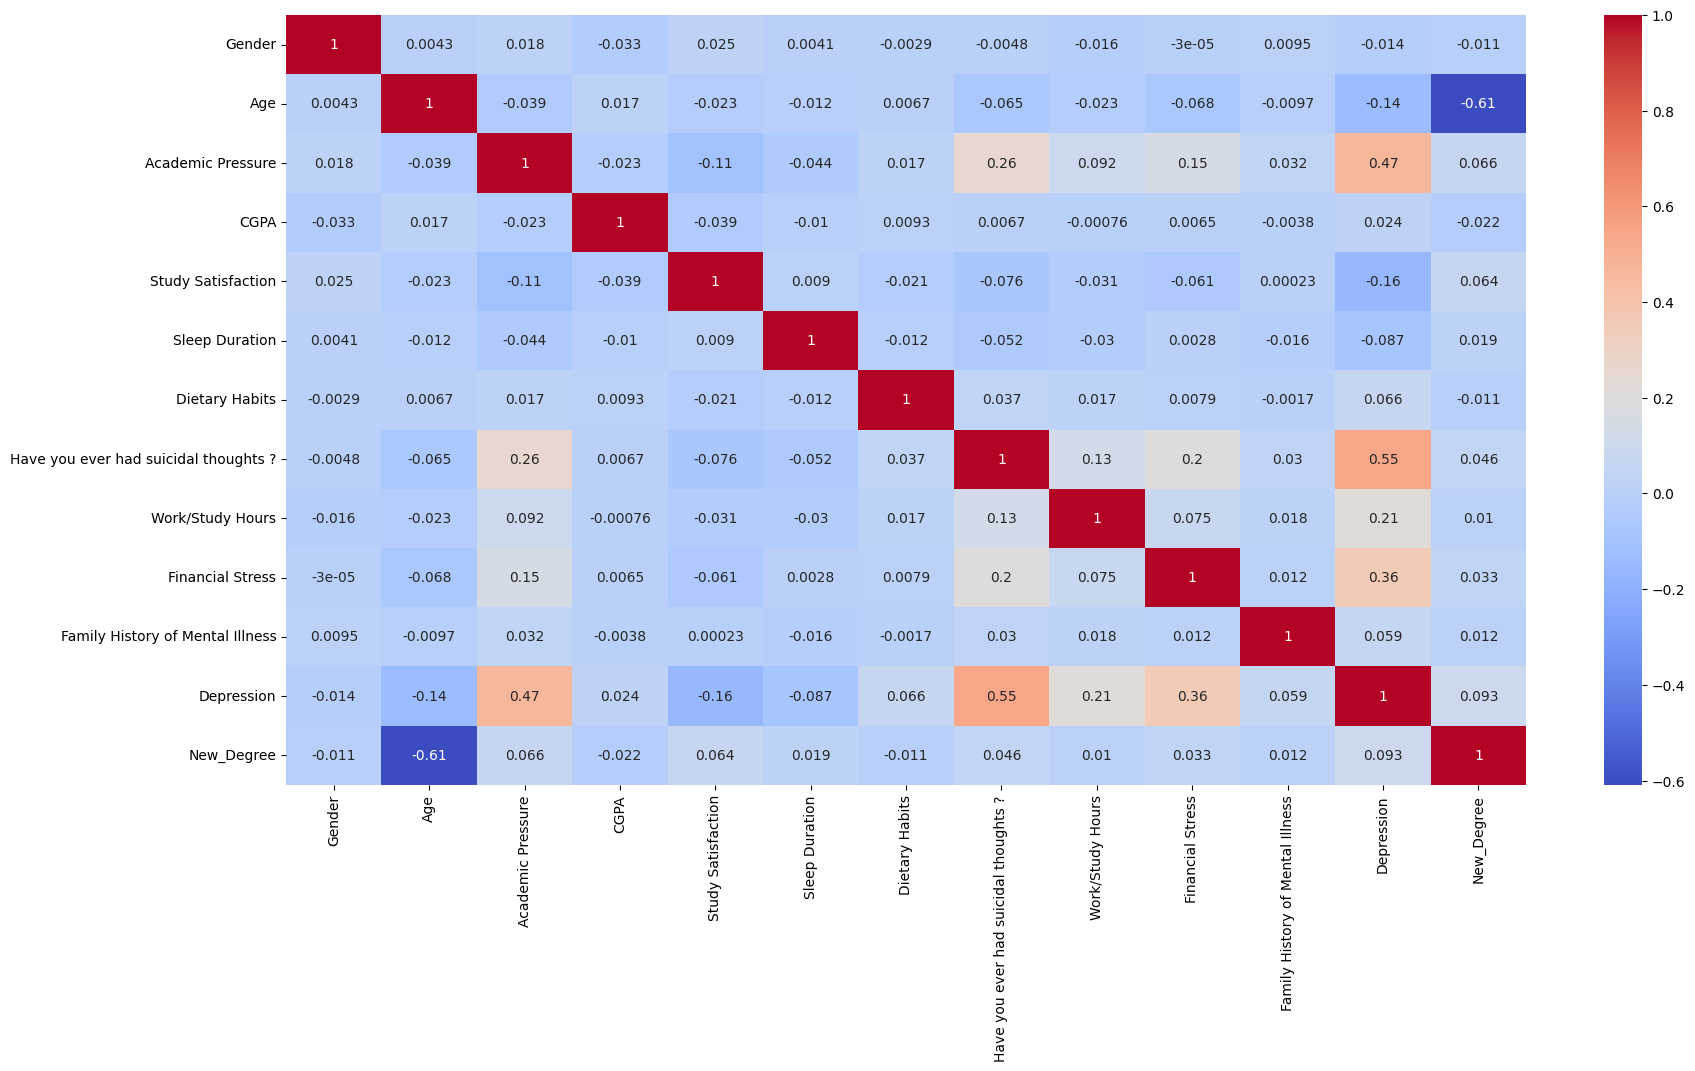

In [119]:
## PLOTTING THE CORRELATION MATRIX
plt.figure(figsize=(20, 10))
sns.heatmap(main_data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [120]:
main.head(3)

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,New_Degree
1,1,24.0,Bangalore,2.0,5.90,5.0,1,2,BSc,0,3.0,2.0,1,0,0
3,1,28.0,Varanasi,3.0,5.59,2.0,2,2,BCA,1,4.0,5.0,1,1,0
4,1,25.0,Jaipur,4.0,8.13,3.0,1,2,M.Tech,1,1.0,1.0,0,0,1


In [ ]:
## CREATING DUMMY VARIABLES FOR THE CITY COLUMN

encoder = OneHotEncoder(sparse_output=False)  
encoded = encoder.fit_transform(main[['City']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['City']))
## ADJUSTING THE INDEX
encoded_df.index = main.index
main_encoded = pd.concat([main, encoded_df], axis=1)

## CHECKING THE NEW DF
main_encoded.columns


Index(['Gender', 'Age', 'City', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression',
       'New_Degree', 'City_Agra', 'City_Ahmedabad', 'City_Bangalore',
       'City_Bhopal', 'City_Chennai', 'City_Delhi', 'City_Faridabad',
       'City_Ghaziabad', 'City_Hyderabad', 'City_Indore', 'City_Jaipur',
       'City_Kalyan', 'City_Kanpur', 'City_Kolkata', 'City_Lucknow',
       'City_Ludhiana', 'City_Meerut', 'City_Mumbai', 'City_Nagpur',
       'City_Nashik', 'City_Patna', 'City_Pune', 'City_Rajkot',
       'City_Srinagar', 'City_Surat', 'City_Thane', 'City_Vadodara',
       'City_Varanasi', 'City_Vasai-Virar', 'City_Visakhapatnam'],
      dtype='object')

In [ ]:
## REMOVING THE ORIGINAL CITY AND OLD DEGREE COLUMN
main_encoded = main_encoded.drop(['City', 'Degree'], axis=1)


In [133]:
## SPLITTING THE DATA INTO FEATURES AND TARGET
X = main_encoded.drop('Depression', axis=1).values  # Features
y = main_encoded['Depression'].values  # Target

## SPLITTING THE DATA INTO TRAIN AND TEST
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## NORMALIZING THE DATA FEATURES USING STANDARD SCALER
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## TRAINING THE MODEL USING LOGISTIC REGRESSION
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

## SCORE
score = model.score(X_test_scaled, y_test)
print(f"Accuracy: {score*100:.2f}%")


Accuracy: 85.29%


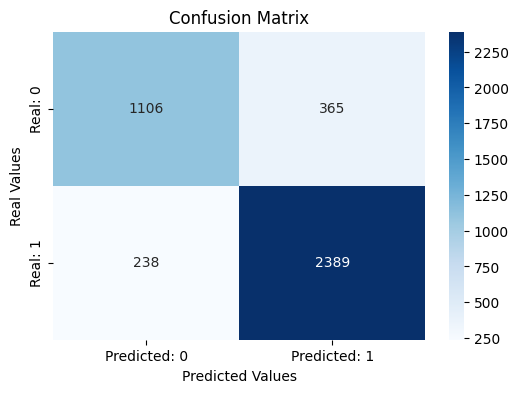

In [140]:
## PLLOTING THE CONFUSION MATRIX
y_pred = model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: 0', 'Predicted: 1'], yticklabels=['Real: 0', 'Real: 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Real Values')
plt.show()


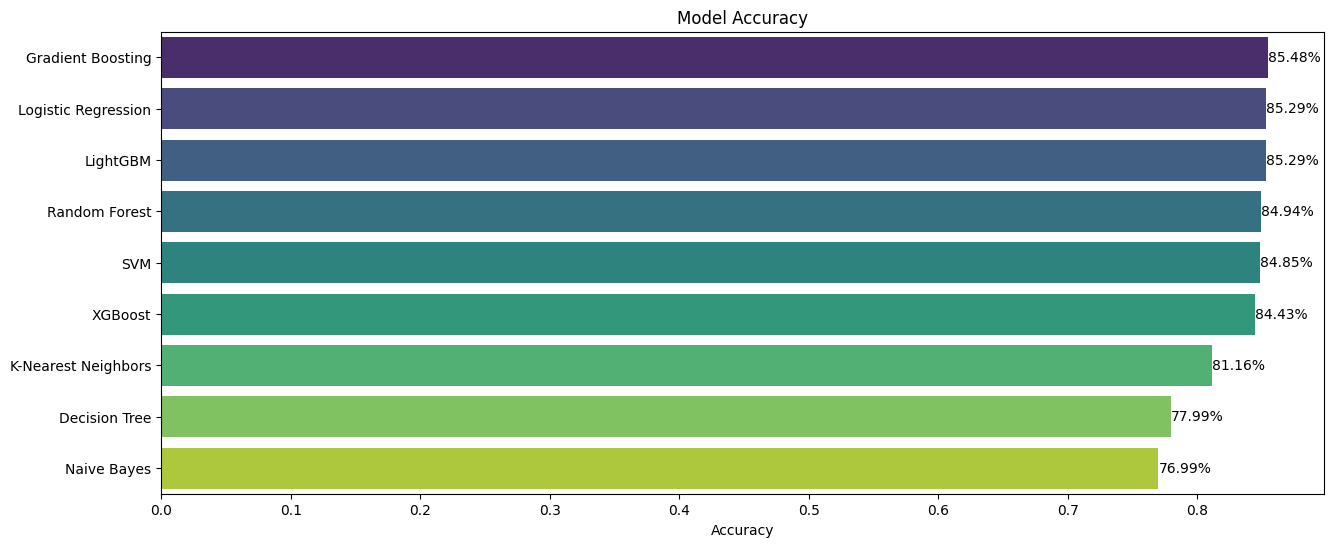

In [160]:
## COMPARING MULTIPLE MODELS TO CHECK THE BEST ONE

## MODELS
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score

## MODELS TO BE COMPARED
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGBoost": xgb.XGBClassifier(random_state=42),
    "LightGBM": lgb.LGBMClassifier(random_state=42, verbose=-1)
}

## TRAINING THE MODELS AND STORING THE ACCURACY
accuracy_results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)  
    y_pred = model.predict(X_test_scaled) 
    accuracy = accuracy_score(y_test, y_pred)  
    accuracy_results[name] = accuracy 

## ORDERING THE ACCURACY RESULTS FROM HIGHEST TO LOWEST
accuracy_results_ordened = dict(sorted(accuracy_results.items(), key=lambda item: item[1], reverse=True))


## PLOTTING THE ACCURACY OF EACH MODEL ORDERING BY HIGHEST ACCURACY AND ADDING THE ACCURACY VALUE ABOVE THE BARS
plt.figure(figsize=(15, 6))
sns.barplot(x=list(accuracy_results_ordened.values()), y=list(accuracy_results_ordened.keys()), palette='viridis', hue=list(accuracy_results_ordened.keys()))
plt.xlabel('Accuracy')
plt.title('Model Accuracy')

## LABELS
for i, v in enumerate(accuracy_results_ordened.values()):
    plt.text(v, i, f'{v*100:.2f}%', color='black', va='center')
plt.show()
